In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import os

from hazma.scalar_mediator import ScalarMediator
from hazma.vector_mediator import VectorMediator
from hazma.parameters import neutral_pion_mass as mpi0
from hazma.cmb import f_eff_ep, f_eff_g

In [12]:
# Masses to scan over
mx_min, mx_max, n_mxs = mpi0/2., 250., 100
mxs = np.linspace(mx_min, mx_max, n_mxs)

Scalar mediator

In [13]:
s_theta = 0.5
sm_hp = ScalarMediator(mx=1., ms=1000., gsxx=1.0, gsff=s_theta, gsGG=s_theta, gsFF=-s_theta)

sm_f_effs = sm_hp.f_effs(mxs)

Vector mediator

In [14]:
vm = VectorMediator(mx=1., mv=1000., gvxx=1., gvuu=1., gvdd=0.2, gvss=0., gvee=0., gvmumu=0.)
# vm_f_effs = vm.f_effs(mxs)  # plot for benchmark couplings

Try different coupling ratios

In [15]:
# Coupling ratios
ratios = np.array([-2, -1., 0., 0.25, 0.5, 0.75, 1.])

# Set up the colormap
cmap = cm.viridis_r
norm = Normalize(vmin=ratios[0], vmax=ratios[-1])
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array(ratios)

vm_f_effs_gvdd = []

for ratio in ratios:
    vm.gvdd = ratio * vm.gvuu
    vm_f_effs_gvdd.append(vm.f_effs(mxs))

Plot together

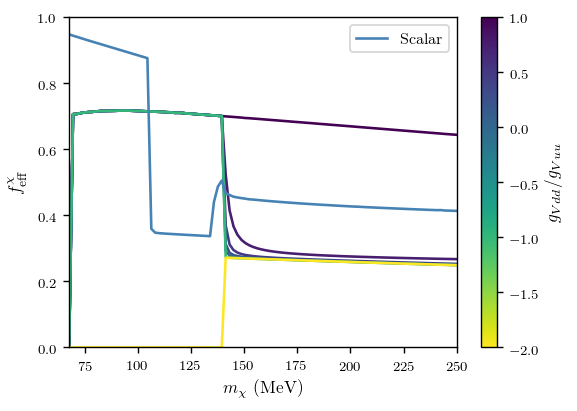

In [21]:
plt.figure(figsize=(5, 3.5))

plt.plot(mxs, vm_f_effs, label="Vector")
# for ratio, vm_f_eff in reversed(zip(ratios, vm_f_effs_gvdd)):
#     plt.plot(mxs, vm_f_eff, color=m.to_rgba(ratio))
    
plt.plot(mxs, sm_f_effs, label="Scalar")

plt.xlim(mxs[[0, -1]])
plt.ylim(0, 1.)
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel(r"$f_{\mathrm{eff}}^\chi$")
plt.legend()
plt.gcf().colorbar(m, ax=plt.gca()).set_label(r"$g_{Vdd} / g_{Vuu}$")

# plt.savefig("figures/f_eff_dm.pdf")

In [18]:
os.system('say "Done computing f effective"')

0

Electron and photon $f_{\mathrm{eff}}$s

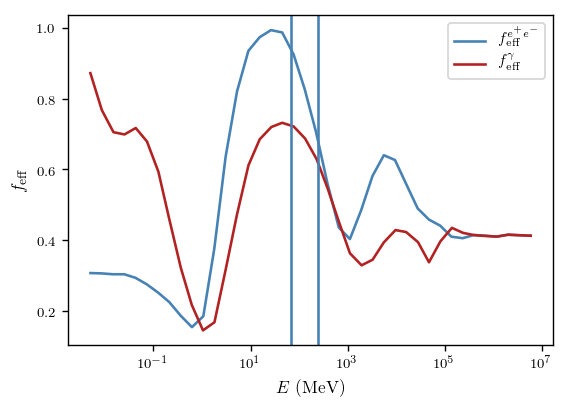

In [27]:
plt.plot(f_eff_ep.x, f_eff_ep.y, label=r"$f_{\mathrm{eff}}^{e^+ e^-}$")
plt.plot(f_eff_g.x, f_eff_g.y, label=r"$f_{\mathrm{eff}}^\gamma$")

# plt.xlim([0.005, 250])
plt.axvline(mxs[0])
plt.axvline(mxs[-1])
plt.xscale("log")
plt.xlabel(r"$E$ (MeV)")
plt.ylabel(r"$f_{\mathrm{eff}}$")
plt.legend()